In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from adjustText import adjust_text

from pyInfinityFlow.Plotting_Utilities import assign_rainbow_colors_to_groups

os.chdir("/media/kyle_storage/kyle_ferchen/grimes_lab_main/analysis/"\
    "2022_12_07_new_multilin_panel/")

In [2]:
# Read in the UMAP coordinates
path_umap_coors = "output/automated_py3_cellharmony_r7/evenly_sampled_r7/"\
    "umap_2d_coordinates_redo.csv"

umap_anno = pd.read_csv(path_umap_coors, index_col=0)

umap_anno

,umap-x,umap-y
cell_id,,
:0,10.952296,-6.878245
:1,10.202045,7.717799
:2,12.240065,-3.202506
:3,6.748181,21.352978
:4,9.314702,5.906703
...,...,...
:1935032,-4.400203,-1.029844
:1935033,12.978972,-5.007983
:1935034,10.876128,5.335987


In [3]:
# Read in R7 cluster assignments
path_r7_labels = "output/automated_py3_cellharmony_r7/"\
    "r7_py3_cellharmony_assigned_infinity_flow_groups_redo.csv"

r7_labels = pd.read_csv(path_r7_labels, index_col=0)

umap_anno["R7"] = r7_labels.loc[umap_anno.index.values, "r7"].values

umap_anno

,umap-x,umap-y,R7
cell_id,,,
:0,10.952296,-6.878245,preNeu-3-ADT
:1,10.202045,7.717799,pre-MultiLin-1
:2,12.240065,-3.202506,preNeu-1
:3,6.748181,21.352978,pre-B-Il2ra
:4,9.314702,5.906703,ETP-CC-4
...,...,...,...
:1935032,-4.400203,-1.029844,ERP4-Bcl2l15
:1935033,12.978972,-5.007983,preNeu-1
:1935034,10.876128,5.335987,MultiLin-1


In [4]:
# Calculate umap centroids to define label positions
umap_centroids = pd.pivot_table(\
    umap_anno, 
    index="R7", 
    values=["umap-x", "umap-y"], 
    aggfunc=np.median)
umap_centroids

,umap-x,umap-y
R7,,
B-cell progenitor,10.238177,16.332132
BMCP,8.020836,1.830814
Baso,5.542482,-0.104552
Bcl11b+_preETP_Cd3d,4.414455,13.773146
Bcl11b+_preETP_Tdrd5,0.311421,15.224574
...,...,...
preNeu-3-Mac_C1qa,12.558509,-4.353347
preNeu-Ebf1,11.756941,-6.640109
proNeu-1,12.703370,0.219995


In [5]:
# # INITIAL: Define colors to use for R7 colors (consistent throughout paper)
# r7_colors = assign_rainbow_colors_to_groups(umap_centroids.index.values)

# # Shuffle
# r7_colors = pd.Series(r7_colors)

# r7_colors = pd.Series(\
#     r7_colors.sample(len(r7_colors), random_state=7).values,
#     r7_colors.index.values)

# pd.Series(r7_colors).to_csv("output/automated_py3_cellharmony_r7/"\
#     "r7_clusters_to_colors_defined_2023_07_13.csv",
#     header=False, index=True)

In [6]:
# Read in consistent R7 color definitions
r7_colors = pd.read_csv("output/automated_py3_cellharmony_r7/"\
    "r7_clusters_to_colors_defined_2023_07_13.csv", 
    index_col=0, header=None).iloc[:,0]
r7_colors.index.name = None

r7_colors

B-cell progenitor       #3670f8
BMCP                    #a8f79c
Baso                    #1e91f3
Bcl11b+_preETP_Cd3d     #0ca7ef
Bcl11b+_preETP_Tdrd5    #3c68f9
                         ...   
preNeu-3-Mac_C1qa       #ff2c16
preNeu-Ebf1             #ffae5e
proNeu-1                #10c6e6
proNeu-1-ADT            #ffa759
proNeu-2                #90feab
Name: 1, Length: 88, dtype: object

In [7]:
# Save bounds if needed later
umap_bounds = pd.concat([\
        pd.Series(umap_anno.iloc[:,:2].min(axis=0), name="min"),
        pd.Series(umap_anno.iloc[:,:2].max(axis=0), name="max")],
    axis=1)
padding = 0.05 * (umap_bounds["max"] - umap_bounds["min"])
umap_bounds["min"] = umap_bounds["min"] - padding
umap_bounds["max"] = umap_bounds["max"] + padding
umap_bounds

,min,max
umap-x,-7.457414,22.110068
umap-y,-11.751718,23.845035


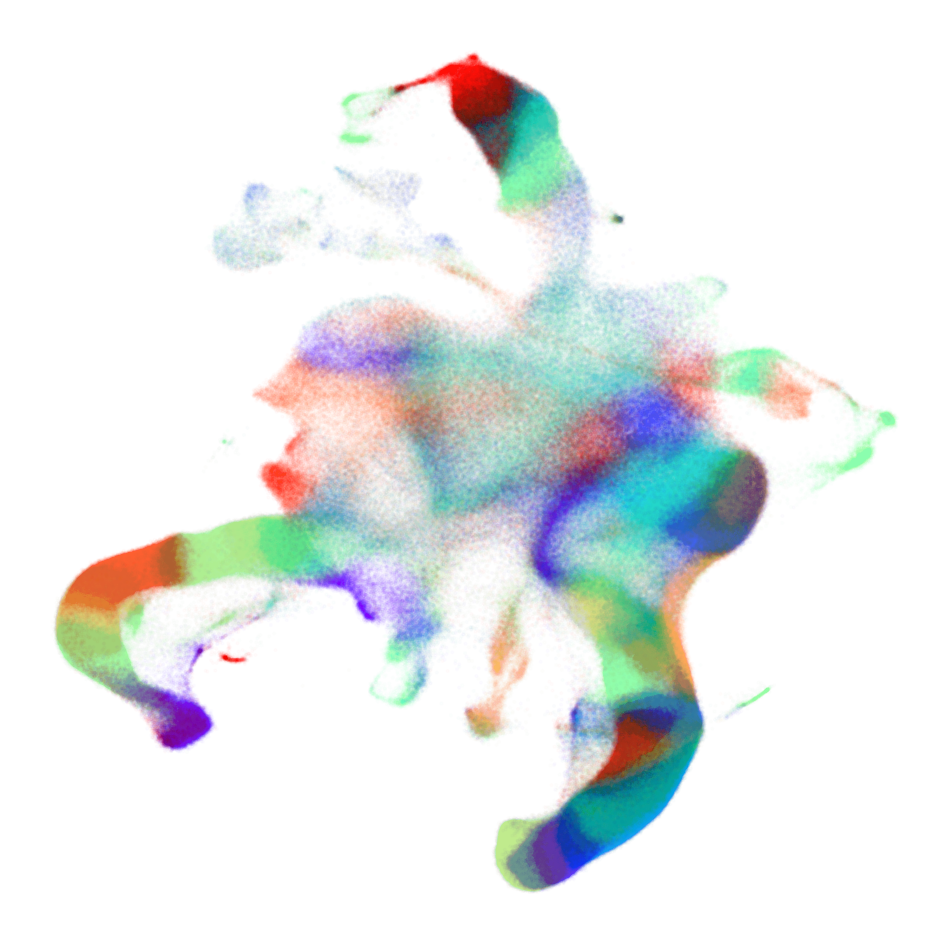

In [8]:
# Plot without labels
plt.close("all")
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(\
    umap_anno.iloc[:,0], 
    umap_anno.iloc[:,1], 
    c=[r7_colors[i] for i in umap_anno["R7"].values], 
    alpha=0.01,
    edgecolors=None, 
    s=4)

ax.set_xlim(umap_bounds.iloc[0,:].values)
ax.set_ylim(umap_bounds.iloc[1,:].values)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("output/automated_py3_cellharmony_r7/evenly_sampled_r7/"\
    "plots_for_pub/inflow_cite_integration_plot_r7_labels_over_2d_umap_no_labels.png",
    dpi=800)

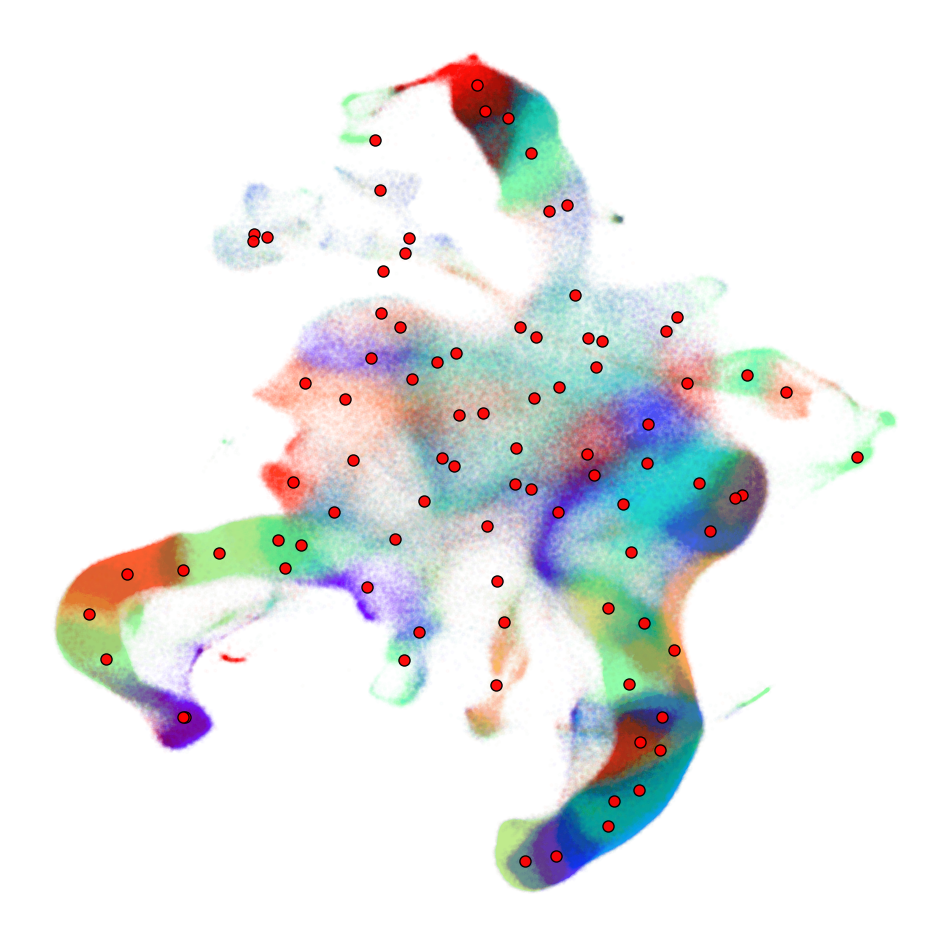

In [10]:
# Add dots for centroid positions
plt.close("all")
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(\
    umap_anno.iloc[:,0], 
    umap_anno.iloc[:,1], 
    c=[r7_colors[i] for i in umap_anno["R7"].values], 
    alpha=0.01,
    edgecolors=None, 
    s=4)

ax.scatter(\
    umap_centroids["umap-x"].values,
    umap_centroids["umap-y"].values,
    color="red",
    alpha=0.95,
    edgecolors="black",
    s=64)

ax.set_xlim(umap_bounds.iloc[0,:].values)
ax.set_ylim(umap_bounds.iloc[1,:].values)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("output/automated_py3_cellharmony_r7/evenly_sampled_r7/"\
    "plots_for_pub/inflow_cite_integration_plot_r7_labels_over_2d_umap_centroid_dots.png",
    dpi=300)

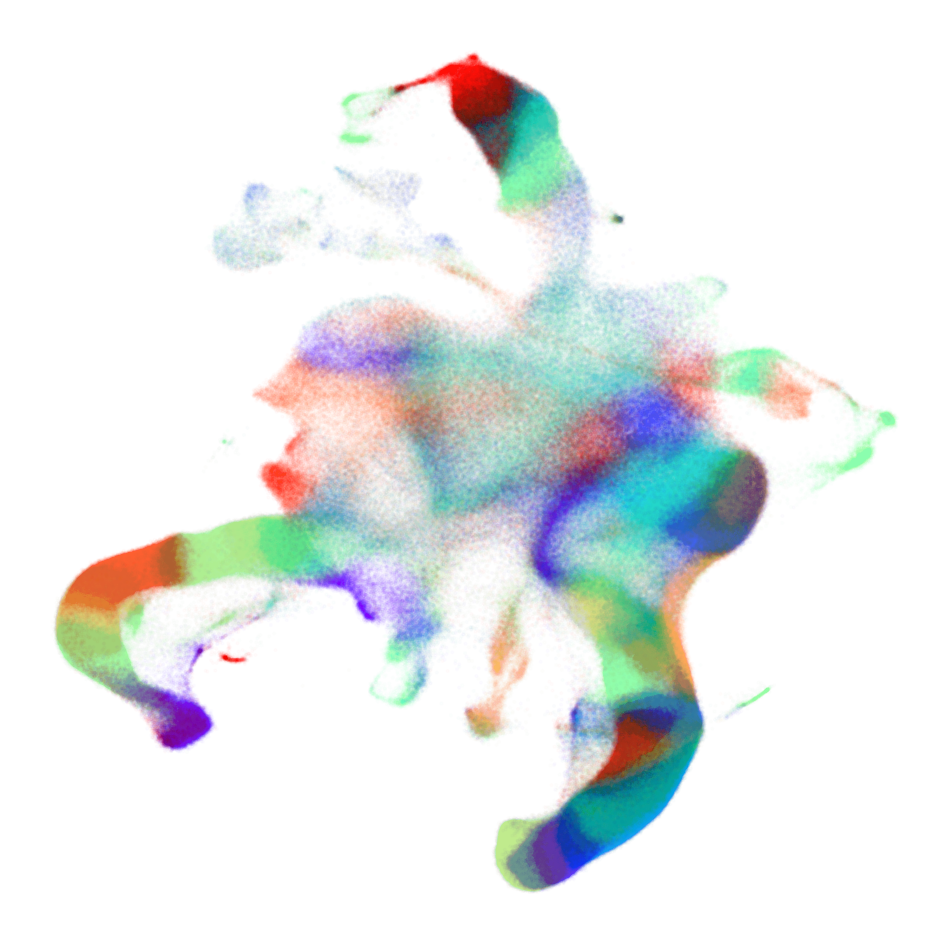

In [9]:
# Plot without labels
plt.close("all")
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(\
    umap_anno.iloc[:,0], 
    umap_anno.iloc[:,1], 
    c=[r7_colors[i] for i in umap_anno["R7"].values], 
    alpha=0.01,
    edgecolors=None, 
    s=4)

ax.set_xlim(umap_bounds.iloc[0,:].values)
ax.set_ylim(umap_bounds.iloc[1,:].values)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("output/automated_py3_cellharmony_r7/evenly_sampled_r7/"\
    "plots_for_pub/inflow_cite_integration_plot_r7_labels_over_2d_umap_no_labels.pdf")

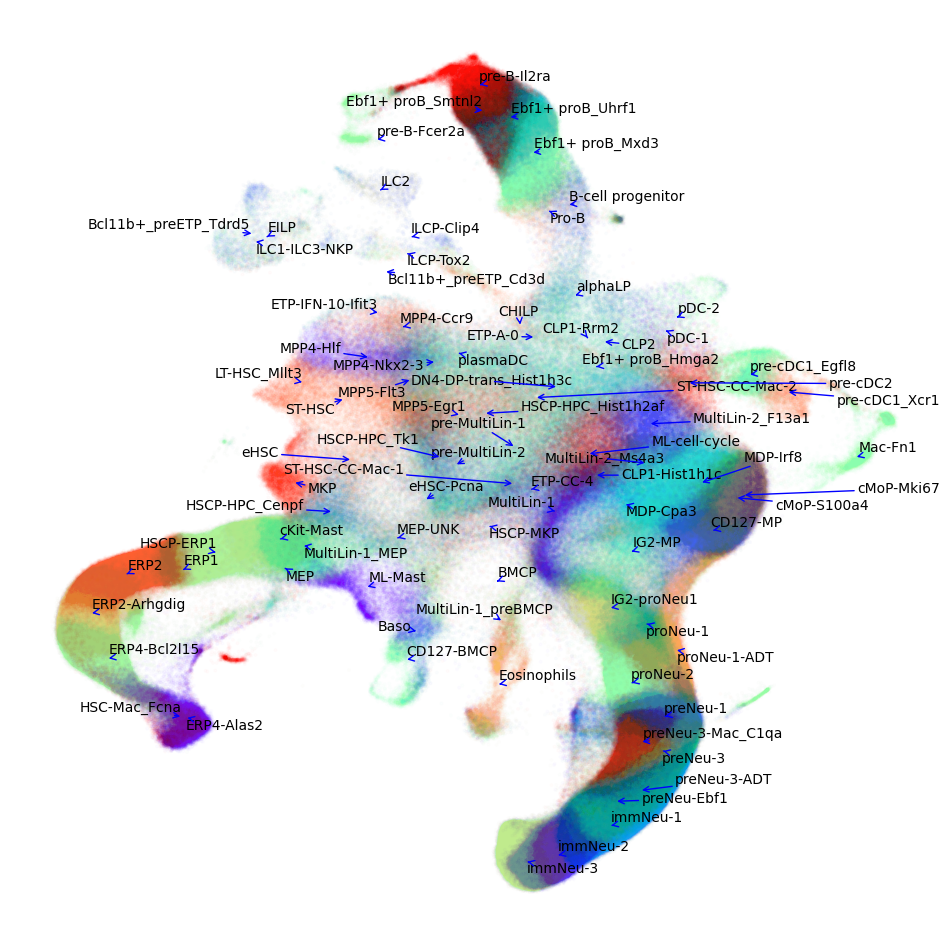

In [37]:
plt.close("all")
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(\
    umap_anno.iloc[:,0], 
    umap_anno.iloc[:,1], 
    c=[r7_colors[i] for i in umap_anno["R7"].values], 
    alpha=0.01,
    edgecolors=None, 
    s=4)
# ax.scatter(umap_centroids.iloc[:,0].values, umap_centroids.iloc[:,1].values,
#     color="red", edgecolors="black")
texts = [ax.text(\
    umap_centroids.loc[item][0],
    umap_centroids.loc[item][1],
    item) for item in umap_centroids.index.values]
adjust_text(\
    texts, 
    x=umap_centroids.iloc[:,0].values, 
    y=umap_centroids.iloc[:,1].values,
    arrowprops=dict(arrowstyle='->', color='blue'))
ax.set_xlim(umap_bounds.iloc[0,:].values)
ax.set_ylim(umap_bounds.iloc[1,:].values)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("output/automated_py3_cellharmony_r7/evenly_sampled_r7/"\
    "plots_for_pub/inflow_cite_integration_plot_r7_labels_over_2d_umap.pdf")

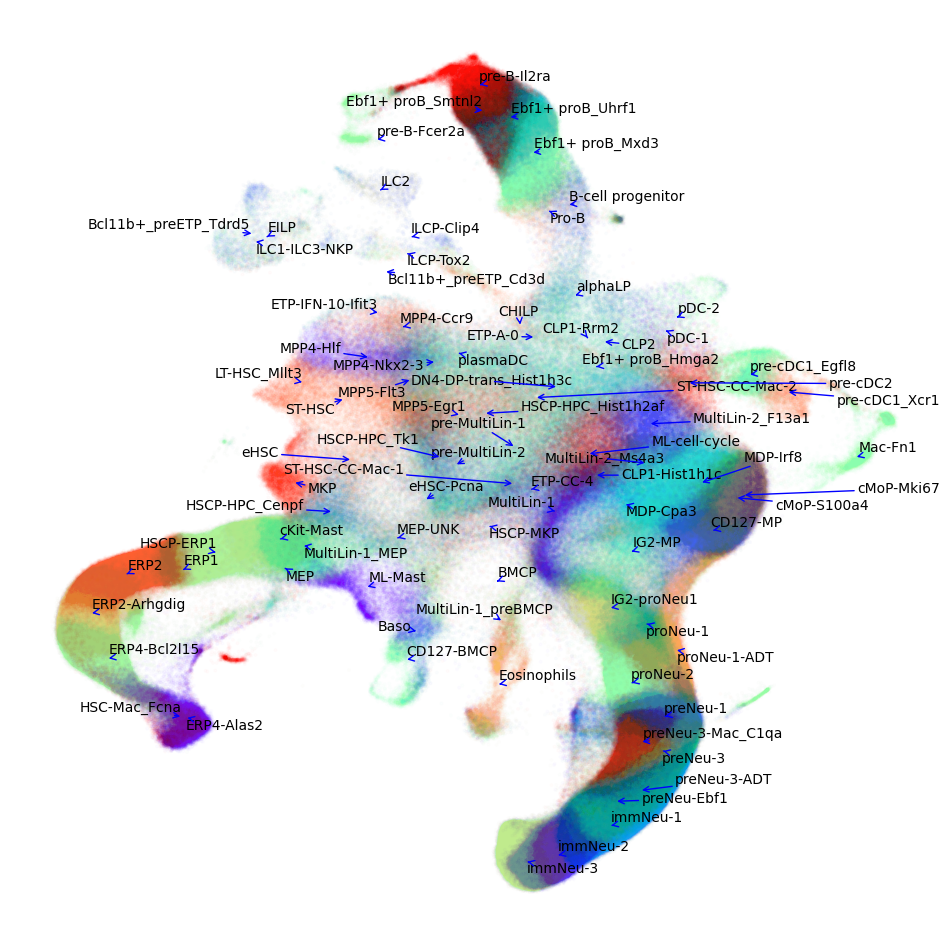

In [38]:
plt.close("all")
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(\
    umap_anno.iloc[:,0], 
    umap_anno.iloc[:,1], 
    c=[r7_colors[i] for i in umap_anno["R7"].values], 
    alpha=0.01,
    edgecolors=None, 
    s=4)
# ax.scatter(umap_centroids.iloc[:,0].values, umap_centroids.iloc[:,1].values,
#     color="red", edgecolors="black")
texts = [ax.text(\
    umap_centroids.loc[item][0],
    umap_centroids.loc[item][1],
    item) for item in umap_centroids.index.values]
adjust_text(\
    texts, 
    x=umap_centroids.iloc[:,0].values, 
    y=umap_centroids.iloc[:,1].values,
    arrowprops=dict(arrowstyle='->', color='blue'))
ax.set_xlim(umap_bounds.iloc[0,:].values)
ax.set_ylim(umap_bounds.iloc[1,:].values)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("output/automated_py3_cellharmony_r7/evenly_sampled_r7/"\
    "plots_for_pub/inflow_cite_integration_plot_r7_labels_over_2d_umap.png",
    dpi=800)